# 1. Data Wrangling

In [2]:
#!pip install folium

In [3]:
import os
import pickle
import folium
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import where
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.image as mpimg

pd.options.display.max_columns = 1000


Bad key text.latex.preview in file C:\Users\zul332\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\zul332\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\zul332\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 

In [4]:
sns.set_style('whitegrid')
warnings.filterwarnings("ignore")

In [5]:
Data = pd.read_csv('../data/TRAIN_SET_2021.csv', header = 0)
Data.shape

(15673, 28)

In [6]:
# Data = Data.drop_duplicates(keep='first')
Data.columns

Index(['RESTAURANT_SERIAL_NUMBER', 'RESTAURANT_PERMIT_NUMBER',
       'RESTAURANT_NAME', 'RESTAURANT_LOCATION', 'RESTAURANT_CATEGORY',
       'ADDRESS', 'CITY', 'STATE', 'ZIP', 'CURRENT_DEMERITS', 'CURRENT_GRADE',
       'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE',
       'INSPECTION_TIME', 'INSPECTION_TYPE', 'INSPECTION_DEMERITS',
       'VIOLATIONS_RAW', 'RECORD_UPDATED', 'LAT_LONG_RAW', 'FIRST_VIOLATION',
       'SECOND_VIOLATION', 'THIRD_VIOLATION', 'FIRST_VIOLATION_TYPE',
       'SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE', 'NUMBER_OF_VIOLATIONS',
       'NEXT_INSPECTION_GRADE_C_OR_BELOW'],
      dtype='object')

There are duplications on restaurant permit number, name and location but no on resetaurant serial number. Therefore, by the serial number, there is no duplicate restaurant record.

In [7]:
print(Data.duplicated('RESTAURANT_SERIAL_NUMBER').sum())
print(Data.duplicated('RESTAURANT_PERMIT_NUMBER').sum())
print(Data.duplicated('RESTAURANT_NAME').sum())
print(Data.duplicated('ADDRESS').sum())

0
7019
7355
10888


In [8]:
Data.dtypes

RESTAURANT_SERIAL_NUMBER             object
RESTAURANT_PERMIT_NUMBER             object
RESTAURANT_NAME                      object
RESTAURANT_LOCATION                  object
RESTAURANT_CATEGORY                  object
ADDRESS                              object
CITY                                 object
STATE                                object
ZIP                                  object
CURRENT_DEMERITS                    float64
CURRENT_GRADE                        object
EMPLOYEE_COUNT                      float64
MEDIAN_EMPLOYEE_AGE                 float64
MEDIAN_EMPLOYEE_TENURE              float64
INSPECTION_TIME                      object
INSPECTION_TYPE                      object
INSPECTION_DEMERITS                  object
VIOLATIONS_RAW                       object
RECORD_UPDATED                       object
LAT_LONG_RAW                         object
FIRST_VIOLATION                     float64
SECOND_VIOLATION                    float64
THIRD_VIOLATION                 

# 2. Data Analysis

The features contained in the dataset can be classified into the following categories:

- **Info**(10): RESTAURANT_SERIAL_NUMBER, RESTAURANT_PERMIT_NUMBER, RESTAURANT_NAME, RESTAURANT_LOCATION, ADDRESS, CITY, STATE, ZIP, LAT_LONG_RAW, VIOLATIONS_RAW

- **Time**(2): INSPECTION_TIME, RECORD_UPDATED.

- **Categorical**(6): RESTAURANT_CATEGORY, CURRENT_GRADE, INSPECTION_TYPE, FIRST_VIOLATION_TYPE, SECOND_VIOLATION_TYPE, THIRD_VIOLATION_TYPE.  

- **Target**(1): NEXT_INSPECTION_GRADE_C_OR_BELOW (Have noise). 

- **Continous**(9): CURRENT_DEMERITS, EMPLOYEE_COUNT, MEDIAN_EMPLOYEE_AGE, MEDIAN_EMPLOYEE_TENURE, INSPECTION_DEMERITS(NA inside), FIRST_VIOLATION, SECOND_VIOLATION, THIRD_VIOLATION, NUMBER_OF_VIOLATIONS (NA inside).


In [9]:
Data.describe()

,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION
count,15457.000000,15580.000000,15639.000000,15376.000000,1.546100e+04,15588.000000,15612.000000
mean,5.239552,22.289345,28.015118,4.030491,7.263423e+02,171.871953,179.269088
std,13.895923,892.830909,4.901565,2.022737,6.976831e+04,80.079188,77.347049
min,-8.000000,-7.000000,14.000000,0.227197,1.000000e+00,2.000000,4.000000
25%,0.000000,8.000000,24.601414,2.551504,2.020000e+02,204.000000,209.000000
50%,5.000000,14.000000,27.968247,3.693207,2.060000e+02,211.000000,215.000000
75%,8.000000,21.000000,31.409235,5.138718,2.110000e+02,215.000000,227.000000
max,1214.000000,111447.000000,49.614076,24.399347,8.675309e+06,302.000000,310.000000


In [10]:
Data.describe().columns

Index(['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'MEDIAN_EMPLOYEE_AGE',
       'MEDIAN_EMPLOYEE_TENURE', 'FIRST_VIOLATION', 'SECOND_VIOLATION',
       'THIRD_VIOLATION'],
      dtype='object')

In [11]:
Data.shape

(15673, 28)

There are 17 features that can affect the prediction results.

In [12]:
identifier_feature = ['RESTAURANT_SERIAL_NUMBER']
continuous_features = ['MEDIAN_EMPLOYEE_AGE', 'MEDIAN_EMPLOYEE_TENURE']
nominal_features = ['RESTAURANT_CATEGORY', 'CITY', 'STATE', 'CURRENT_GRADE',
                    'INSPECTION_TYPE','FIRST_VIOLATION', 'SECOND_VIOLATION',
                    'THIRD_VIOLATION','FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE','THIRD_VIOLATION_TYPE']
numeric_feactures = ['CURRENT_DEMERITS', 'EMPLOYEE_COUNT', 'INSPECTION_DEMERITS',
                     'NUMBER_OF_VIOLATIONS']
target = ['NEXT_INSPECTION_GRADE_C_OR_BELOW']
selected_features = nominal_features+ numeric_feactures+ continuous_features+ target

## 2.1 Target Feature

1. Target feature ('NEXT_INSPECTION_GRADE_C_OR_BELOW') has outliers, including Goat, 9, 7, 4, 3, -3, and null. For target feature, 0 means Next inspection Grade not C or below C; 1 means Next inspection Grade is C or below C
2. Here we have highly imbalance data for class 0 (13143) and class 1 (2484)  

In [13]:
Data.groupby('NEXT_INSPECTION_GRADE_C_OR_BELOW').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS
NEXT_INSPECTION_GRADE_C_OR_BELOW,,,,,,,,,,,,,,,,,,,,,,,,,,,
-3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,13143,13143,13091,12971,13041,13087,12945,12968,13093,12955,12887,13060,13117,12890,12991,12943,12926,13001,13041,13130,12962,13075,13091,13022,12915,12998,13009
1,2484,2484,2471,2456,2457,2471,2447,2450,2475,2456,2434,2474,2476,2440,2453,2463,2447,2461,2467,2482,2453,2467,2476,2459,2445,2456,2449
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Goat,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:
Data[Data['NEXT_INSPECTION_GRADE_C_OR_BELOW'].isnull()].shape

(40, 28)

In [15]:
Data = Data[ (Data.NEXT_INSPECTION_GRADE_C_OR_BELOW =='0') | (Data.NEXT_INSPECTION_GRADE_C_OR_BELOW =='1') ]
Data.shape

(15627, 28)

## 2.2 Info Features

- **Info**(10): RESTAURANT_SERIAL_NUMBER, RESTAURANT_PERMIT_NUMBER, RESTAURANT_NAME, RESTAURANT_LOCATION, ADDRESS, CITY, STATE, ZIP, LAT_LONG_RAW, VIOLATIONS_RAW

- **Location**(2) : Longitude and Latitude

In [16]:
Data['LAT_LONG_RAW']

0        (36.1221442, 115.1652749)
1          (36.218691, 115.242913)
2        (36.2498922, 115.2441383)
3          (36.183669, 115.112355)
4        (36.1100828, 115.1538714)
                   ...            
15668    (36.1143212, 115.1708662)
15669    (36.2165221, 115.1189671)
15670    (36.1282071, 115.1730081)
15671     (35.9915189, 114.830906)
15672     (35.144642, 114.5765406)
Name: LAT_LONG_RAW, Length: 15627, dtype: object

In [17]:
Data['LAT_LONG_RAW']=Data['LAT_LONG_RAW'].str.replace('\(|\)','')
Data[['LAT', 'LONG']] = Data['LAT_LONG_RAW'].str.split(',', 1, expand=True)

Remove NaN in Longitude and Latitude. 

In [18]:
print(Data[Data['LAT'].isnull()].shape)
print(Data[Data['LONG'].isnull()].shape)

(15, 30)
(15, 30)


In [19]:
Data = Data.drop(Data[Data['LAT'].isnull()].index)
Data = Data.drop(Data[Data['LONG'].isnull()].index)
print(Data.shape)

(15612, 30)


In [20]:
Data[['LAT_LONG_RAW','LAT', 'LONG']].head(10)

,LAT_LONG_RAW,LAT,LONG
0,"36.1221442, 115.1652749",36.1221442,115.1652749
1,"36.218691, 115.242913",36.218691,115.242913
2,"36.2498922, 115.2441383",36.2498922,115.2441383
3,"36.183669, 115.112355",36.183669,115.112355
4,"36.1100828, 115.1538714",36.1100828,115.1538714
5,"36.1027192, 115.201984",36.1027192,115.201984
6,"36.11205, 115.314812",36.11205,115.314812
7,"36.0977824, 115.1198557",36.0977824,115.1198557
8,"35.9785911, 114.8324851",35.9785911,114.8324851
9,"36.1123576, 115.1702213",36.1123576,115.1702213


In [21]:
print(Data['LAT'].isnull().sum())
print(Data['LONG'].isnull().sum())

0
0


In [22]:
map_data = Data[['LAT', 'LONG']]
map_data = map_data.astype(float)
map_data['Right_LONG'] = -map_data[['LONG']]
map_data[['RESTAURANT_SERIAL_NUMBER']] = Data[['RESTAURANT_SERIAL_NUMBER']]
map_data = map_data.dropna()
map_data.head()

,LAT,LONG,Right_LONG,RESTAURANT_SERIAL_NUMBER
0,36.122144,115.165275,-115.165275,DA1117270
1,36.218691,115.242913,-115.242913,DA1014948
2,36.249892,115.244138,-115.244138,DA0861994
3,36.183669,115.112355,-115.112355,DA0896719
4,36.110083,115.153871,-115.153871,DA1031041


In [24]:
mymap= folium.Map(location=[36.120713, -115.07425],zoom_start=13,zoom_control='False',attr='AutoNavi')
tooltip ='Click me to check Restaurant_Serial_Number'
for sample in np.arange(1000):
    folium.Marker([map_data.iloc[sample][0], map_data.iloc[sample][2]], popup=str(map_data.iloc[sample][3]),tooltip=tooltip).add_to(mymap)
mymap

## 2.2 Continuous Features

- **Continous**(9): CURRENT_DEMERITS, EMPLOYEE_COUNT, MEDIAN_EMPLOYEE_AGE, MEDIAN_EMPLOYEE_TENURE, INSPECTION_DEMERITS(NA inside), FIRST_VIOLATION, SECOND_VIOLATION, THIRD_VIOLATION, NUMBER_OF_VIOLATIONS (NA inside).

- **Current Demerits**
 1. Current_Demerits has negative and large number not make sense.
 2. Fill NaN with median. 

In [23]:
Data.groupby('CURRENT_DEMERITS').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
CURRENT_DEMERITS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.00,3918,3918,3906,3864,3885,3902,3871,3861,3898,3835,3887,3913,3844,3880,3869,3846,3873,3888,3918,3855,3902,3901,3885,3849,3873,3878,3918,3918,3918
1.00,47,47,47,47,47,47,46,46,47,47,47,47,46,46,46,46,45,47,47,47,47,47,46,46,47,47,47,47,47
2.00,35,35,35,34,35,35,35,34,35,35,35,34,35,34,35,34,34,35,35,35,35,34,34,34,34,35,35,35,35
3.00,3111,3111,3099,3062,3088,3101,3054,3076,3105,3060,3094,3103,3059,3075,3066,3059,3079,3086,3111,3082,3094,3099,3086,3055,3080,3082,3111,3111,3111
3.14,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
4.00,60,60,60,60,60,60,58,60,60,60,59,60,58,60,60,60,59,60,60,58,60,60,59,58,60,58,60,60,60
5.00,762,762,758,748,760,761,749,751,758,752,758,757,748,755,750,751,751,756,762,753,761,760,755,750,755,753,762,762,762
6.00,2197,2197,2184,2180,2189,2182,2160,2163,2187,2155,2182,2191,2153,2178,2156,2161,2174,2184,2197,2172,2181,2187,2170,2165,2167,2176,2197,2197,2197
7.00,111,111,111,108,110,110,110,109,111,109,111,111,107,110,110,109,111,111,111,110,111,111,109,109,111,110,111,111,111


In [24]:
Data[Data['CURRENT_DEMERITS'].isnull()].shape

(216, 30)

In [25]:
Data['CURRENT_DEMERITS'] = Data['CURRENT_DEMERITS'].fillna(Data['CURRENT_DEMERITS'].median())
Data[Data['CURRENT_DEMERITS'].isnull()].shape

(0, 30)

In [26]:
Data = Data[(Data.CURRENT_DEMERITS >= 0) & (Data.CURRENT_DEMERITS < 100)]
Data.shape

(15602, 30)

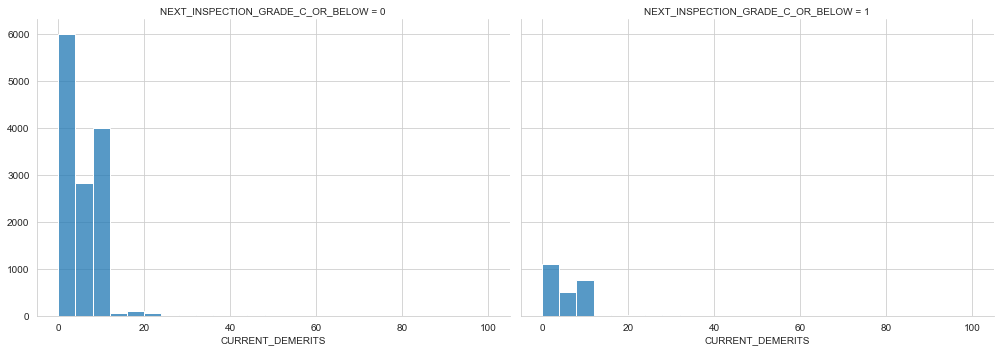

In [27]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'CURRENT_DEMERITS', binwidth=4)

- **Employee Count**
 1. Employee_Count has negative and large number not make sense.
 2. Fill NaN with median. 

In [28]:
Data.groupby('EMPLOYEE_COUNT').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
EMPLOYEE_COUNT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-7.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3.0,2141,2141,2132,2109,2127,2130,2112,2119,2139,2141,2108,2138,2102,2108,2108,2111,2116,2125,2141,2098,2130,2135,2120,2095,2107,2121,2141,2141,2141
4.0,359,359,359,356,357,358,352,355,358,359,348,359,351,356,349,350,357,357,359,357,358,354,358,352,354,355,359,359,359
5.0,412,412,411,411,408,409,406,406,411,412,401,412,403,403,407,403,408,409,412,406,409,409,408,409,407,410,412,412,412
6.0,430,430,427,423,429,429,423,426,430,430,420,428,421,427,423,420,430,424,430,422,427,428,427,422,423,426,430,430,430
7.0,449,449,448,444,446,445,440,443,447,449,438,448,440,443,446,437,445,446,449,446,449,446,446,440,445,447,449,449,449
8.0,508,508,507,506,502,505,502,500,504,508,500,506,497,503,501,500,507,503,508,503,507,508,504,501,506,497,508,508,508
9.0,523,523,521,516,519,518,517,512,522,523,510,521,515,514,517,511,516,519,523,519,518,521,515,517,515,518,523,523,523
10.0,571,571,570,560,565,567,563,563,571,571,560,569,559,567,565,563,569,565,571,564,571,567,566,560,564,566,571,571,571


In [29]:
Data[Data['EMPLOYEE_COUNT'].isnull()].shape

(93, 30)

In [30]:
Data['EMPLOYEE_COUNT'] = Data['EMPLOYEE_COUNT'].fillna(Data['EMPLOYEE_COUNT'].median())
Data[Data['EMPLOYEE_COUNT'].isnull()].shape

(0, 30)

In [31]:
Data = Data[ (Data.EMPLOYEE_COUNT > 0) & (Data.EMPLOYEE_COUNT <= 100) ]
Data.shape

(15598, 30)

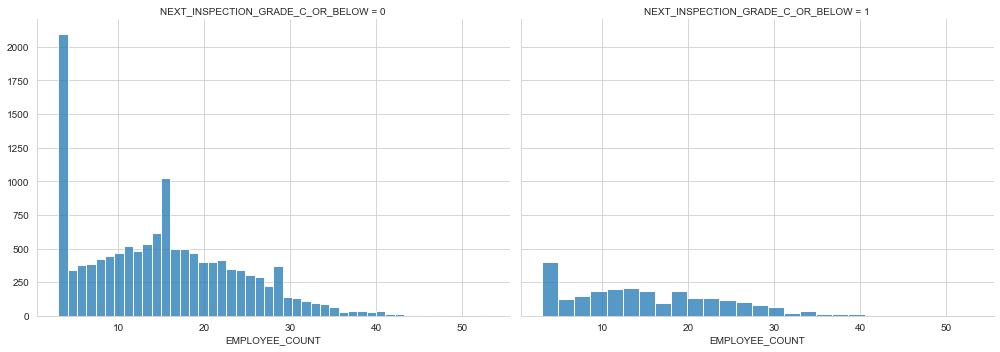

In [32]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'EMPLOYEE_COUNT')

- **Median Employee Age**
 1. Meidan Employee Age: Fill NaN with median.

In [33]:
Data.groupby('MEDIAN_EMPLOYEE_AGE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
MEDIAN_EMPLOYEE_AGE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14.000000,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.000000,347,347,347,343,343,346,339,343,346,347,339,347,342,346,339,343,344,346,347,340,345,346,345,339,344,345,347,347,347
18.000114,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.008775,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.014817,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.360894,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
46.951083,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1
47.607050,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [34]:
Data[Data['MEDIAN_EMPLOYEE_AGE'].isnull()].shape

(34, 30)

In [35]:
Data['MEDIAN_EMPLOYEE_AGE'] = Data['MEDIAN_EMPLOYEE_AGE'].fillna(Data['MEDIAN_EMPLOYEE_AGE'].median())
Data[Data['MEDIAN_EMPLOYEE_AGE'].isnull()].shape

(0, 30)

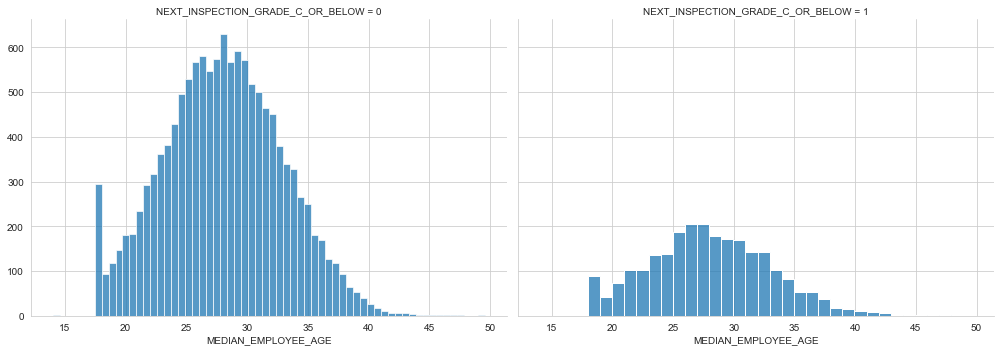

In [36]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'MEDIAN_EMPLOYEE_AGE')

- **Median Employee Tenure**
 1. Meidan Employee Tenure: Fill NaN with median. 

In [37]:
Data.groupby('MEDIAN_EMPLOYEE_TENURE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
MEDIAN_EMPLOYEE_TENURE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.227197,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.251929,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.257812,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.259787,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
0.301725,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.907775,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
16.314675,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
16.433564,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [38]:
Data[Data['MEDIAN_EMPLOYEE_TENURE'].isnull()].shape

(295, 30)

In [39]:
Data['MEDIAN_EMPLOYEE_TENURE'] = Data['MEDIAN_EMPLOYEE_TENURE'].fillna(Data['MEDIAN_EMPLOYEE_TENURE'].median())
Data[Data['MEDIAN_EMPLOYEE_TENURE'].isnull()].shape

(0, 30)

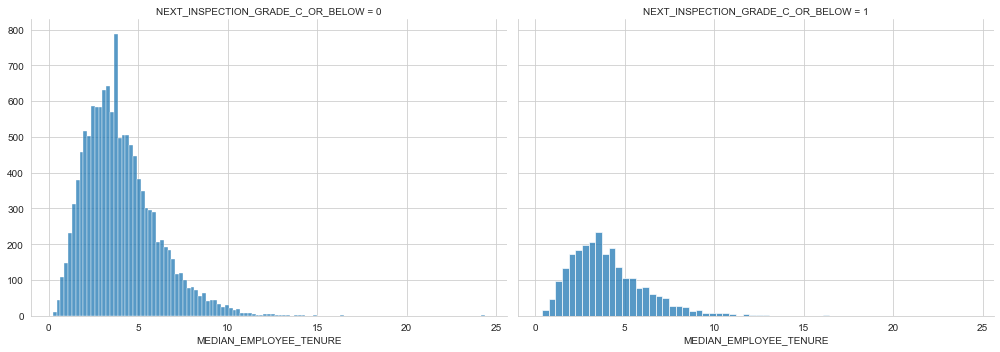

In [40]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'MEDIAN_EMPLOYEE_TENURE')

- **Inspection Demerits**
 1. Inspection Demerits: Fill NaN with median. 
 2. Has a String, need to convert to float 

In [41]:
Data.groupby('INSPECTION_DEMERITS').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
INSPECTION_DEMERITS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
10,1901,1901,1892,1877,1886,1887,1872,1874,1892,1901,1865,1901,1901,1901,1889,1872,1879,1886,1901,1882,1889,1895,1880,1874,1880,1881,1901,1901,1901
11,107,107,107,105,106,106,107,105,106,107,106,107,107,107,105,106,104,107,107,106,105,107,105,106,105,105,107,107,107
12,157,157,156,155,155,156,155,156,157,157,155,157,157,157,152,153,154,155,157,153,157,157,154,153,156,154,157,157,157
13,144,144,142,141,144,144,142,143,144,144,142,144,144,144,143,143,144,144,144,140,144,144,143,139,142,141,144,144,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1011,1011,1006,999,1004,1006,1001,993,1005,1011,987,1011,1011,1011,998,997,1000,998,1011,1000,1006,1008,1000,993,999,1005,1011,1011,1011
86,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [42]:
Data = Data.drop(Data.loc[Data['INSPECTION_DEMERITS']=='Routine Inspection'].index)
Data['INSPECTION_DEMERITS'] = pd.to_numeric(Data['INSPECTION_DEMERITS'], downcast="float")

In [43]:
Data[Data['INSPECTION_DEMERITS'].isnull()].shape

(254, 30)

In [44]:
Data['INSPECTION_DEMERITS'] = Data['INSPECTION_DEMERITS'].fillna(Data['INSPECTION_DEMERITS'].median())
Data[Data['INSPECTION_DEMERITS'].isnull()].shape

(0, 30)

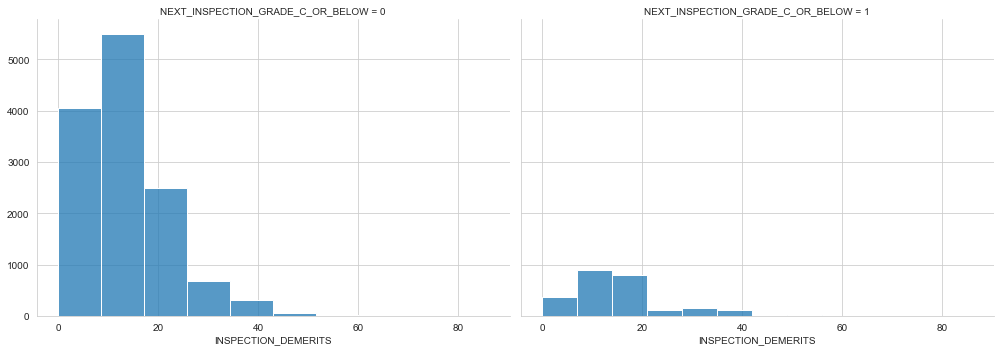

In [45]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'INSPECTION_DEMERITS', bins = 10)

- **First Violation**
 1. First Violation has a noisy row.
 2. Fill NaN with median. 

In [46]:
Data.groupby('FIRST_VIOLATION').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
FIRST_VIOLATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,19,19,19,19,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,17,19,19,19,19,19
2.0,151,151,151,150,146,149,149,151,150,151,148,151,151,151,150,148,151,150,151,151,148,151,147,146,149,150,151,151,151
3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4.0,343,343,342,341,340,342,331,338,343,343,337,343,343,343,342,339,343,337,341,343,342,342,342,336,342,338,343,343,343
5.0,38,38,38,38,38,38,36,38,38,38,37,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229.0,55,55,55,54,54,54,52,55,54,55,54,55,55,55,55,54,55,55,54,55,55,54,55,53,55,55,55,55,55
230.0,31,31,31,31,31,30,30,31,31,31,30,31,31,31,31,31,31,31,31,31,30,31,31,30,31,31,31,31,31
231.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [47]:
Data[Data['FIRST_VIOLATION'].isnull()].shape

(212, 30)

In [48]:
Data['FIRST_VIOLATION'] = Data['FIRST_VIOLATION'].fillna(Data['FIRST_VIOLATION'].median())
Data[Data['FIRST_VIOLATION'].isnull()].shape

(0, 30)

In [49]:
Data = Data[ (Data.FIRST_VIOLATION <= 400) ]
Data.shape

(15596, 30)

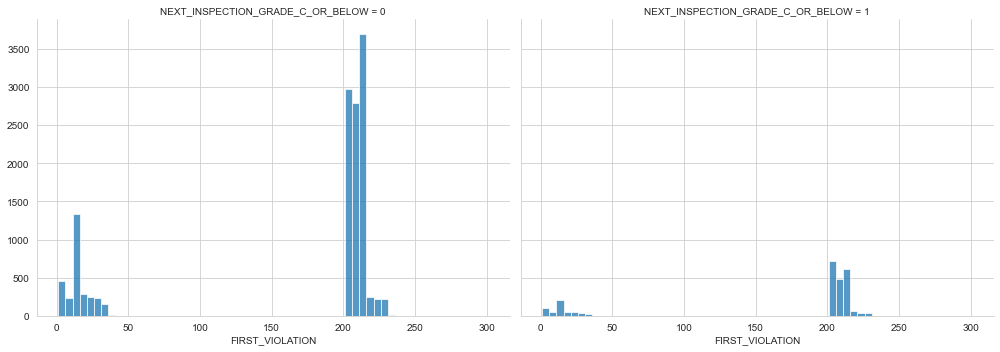

In [50]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'FIRST_VIOLATION', binwidth=5)

- **Second Violation**
 1. Second Violation: Fill NaN with median. 

In [51]:
Data.groupby('SECOND_VIOLATION').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
SECOND_VIOLATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7,7,7,7,7
4.0,24,24,24,24,23,24,24,24,24,24,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
5.0,17,17,17,17,17,17,16,17,17,17,15,17,17,17,17,16,17,17,17,17,17,17,17,16,17,17,17,17,17
7.0,18,18,18,18,18,18,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18,18,18
8.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231.0,71,71,71,71,71,71,69,70,71,71,71,71,71,71,71,70,71,71,71,71,71,70,70,69,71,71,71,71,71
232.0,85,85,85,85,84,84,84,84,84,85,82,85,85,85,83,85,85,84,85,85,85,84,85,84,85,84,85,85,85
233.0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [52]:
Data[Data['SECOND_VIOLATION'].isnull()].shape

(85, 30)

In [53]:
Data['SECOND_VIOLATION'] = Data['SECOND_VIOLATION'].fillna(Data['SECOND_VIOLATION'].median())
Data[Data['SECOND_VIOLATION'].isnull()].shape

(0, 30)

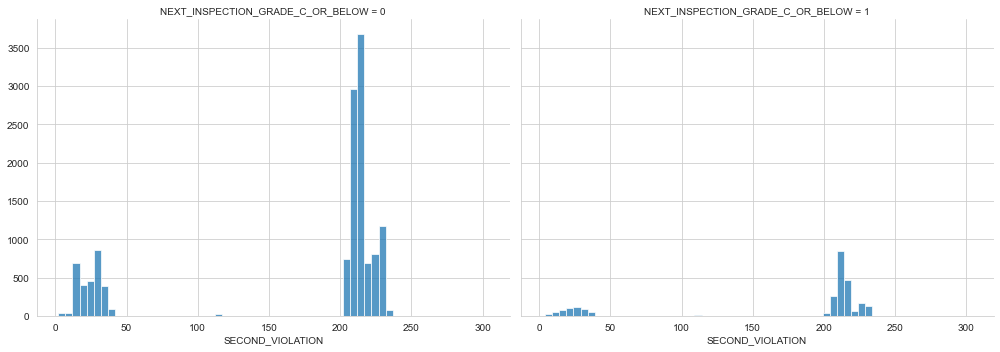

In [54]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'SECOND_VIOLATION', binwidth=5)

- **Third Violation**
 1. Third Violation: Fill NaN with median.  

In [55]:
Data.groupby('THIRD_VIOLATION').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
THIRD_VIOLATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,7,7,7,7,7
5.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7.0,4,4,4,4,3,4,3,4,4,4,3,4,4,4,4,3,4,4,4,4,4,4,4,3,4,4,4,4,4
9.0,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
12.0,17,17,17,17,17,17,17,17,17,17,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
305.0,3,3,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
306.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [56]:
Data[Data['THIRD_VIOLATION'].isnull()].shape

(60, 30)

In [57]:
Data['THIRD_VIOLATION'] = Data['THIRD_VIOLATION'].fillna(Data['THIRD_VIOLATION'].median())
Data[Data['THIRD_VIOLATION'].isnull()].shape

(0, 30)

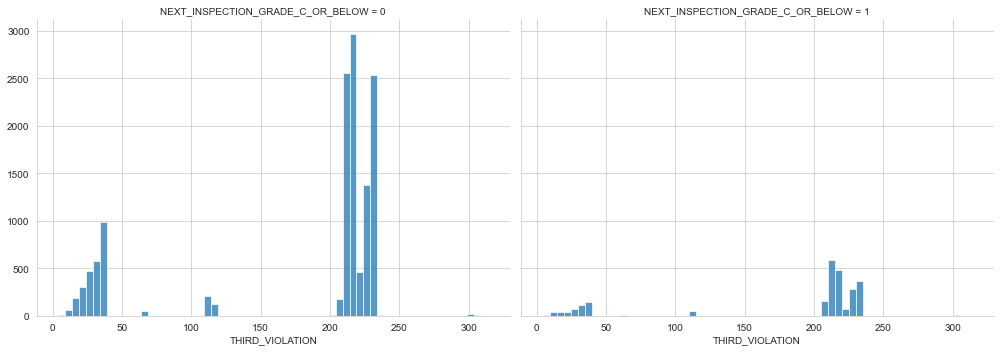

In [58]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'THIRD_VIOLATION', binwidth=5)

- **Number of Violations**
 1. Number of Violations: Fill NaN with median. 
 2. Has a String. 

In [59]:
Data.groupby('NUMBER_OF_VIOLATIONS').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
NUMBER_OF_VIOLATIONS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,486,486,483,482,483,486,480,480,482,486,473,486,486,486,481,476,486,479,483,486,486,486,486,485,481,484,486,486,486
11,332,332,330,328,327,331,327,329,330,332,325,332,332,332,329,328,332,329,328,332,332,332,332,324,327,328,332,332,332
12,271,271,270,268,269,271,265,266,271,271,265,271,271,271,271,270,271,268,268,271,271,271,271,269,264,269,271,271,271
13,192,192,190,188,192,192,188,191,191,192,187,192,192,192,189,190,192,192,189,192,192,192,192,189,188,188,192,192,192
14,132,132,132,131,131,132,129,129,131,132,130,132,132,132,132,128,132,131,132,132,132,132,132,130,132,132,132,132,132
15,104,104,104,101,103,100,102,102,104,104,104,104,104,104,103,101,104,104,103,104,104,104,104,102,98,102,104,104,104
16,69,69,68,69,69,69,67,67,68,69,66,69,69,69,69,69,69,68,68,69,69,69,69,68,67,69,69,69,69
17,40,40,40,40,40,40,39,40,40,40,38,40,40,40,40,39,40,40,40,40,40,40,40,40,38,40,40,40,40
18,27,27,27,26,27,27,26,27,27,27,26,27,27,27,25,26,27,26,27,27,27,27,27,27,27,27,27,27,27


In [60]:
Data = Data.drop(Data.loc[Data['NUMBER_OF_VIOLATIONS']=='Nevada'].index)
Data['NUMBER_OF_VIOLATIONS'] = pd.to_numeric(Data['NUMBER_OF_VIOLATIONS'], downcast="float")

In [61]:
Data[Data['NUMBER_OF_VIOLATIONS'].isnull()].shape

(169, 30)

In [62]:
Data['NUMBER_OF_VIOLATIONS'] = Data['NUMBER_OF_VIOLATIONS'].fillna(Data['NUMBER_OF_VIOLATIONS'].median())
Data[Data['NUMBER_OF_VIOLATIONS'].isnull()].shape

(0, 30)

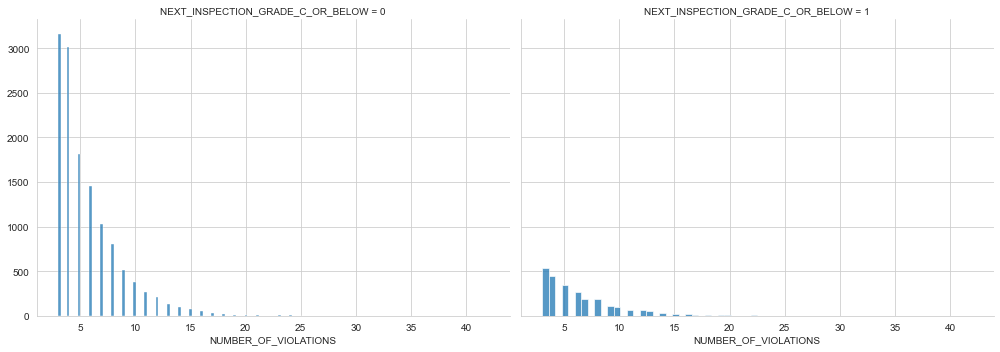

In [63]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'NUMBER_OF_VIOLATIONS')

## 2.4 Categorical Columns

- **Categorical**(6): RESTAURANT_CATEGORY, CURRENT_GRADE, INSPECTION_TYPE, FIRST_VIOLATION_TYPE, SECOND_VIOLATION_TYPE, THIRD_VIOLATION_TYPE. 

- **Restaurant Category**
 1. Inspection Type: Fill NaN with mode.


In [64]:
Data.groupby('RESTAURANT_CATEGORY').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
RESTAURANT_CATEGORY,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bakery Sales,47,47,47,47,47,47,46,46,47,47,47,47,47,47,46,47,47,47,47,47,47,47,47,46,46,47,47,47,47
Banquet Kitchen,65,65,64,65,65,65,64,65,65,64,65,65,65,64,65,65,65,64,65,65,65,65,65,63,63,65,65,65,65
Banquet Support,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,14,15,16,16,16,16
Bar / Tavern,2361,2361,2355,2335,2349,2334,2329,2356,2361,2316,2361,2361,2361,2340,2331,2361,2334,2340,2361,2361,2361,2361,2338,2313,2335,2361,2361,2361,2361
Barbeque,14,14,14,14,14,14,14,14,14,14,14,14,14,14,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Beer Bar,3,3,3,2,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3
Buffet,226,226,225,223,226,221,223,225,226,222,226,226,226,222,221,226,225,225,226,226,226,226,223,222,224,226,226,226,226
Caterer,69,69,68,68,68,67,69,69,69,66,69,69,69,67,67,69,68,69,69,69,69,69,69,68,68,69,69,69,69
Childcare Kitchens,15,15,15,15,15,13,15,15,15,14,15,15,15,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15


In [65]:
Data[Data['RESTAURANT_CATEGORY'].isnull()].shape

(129, 30)

In [66]:
Data['RESTAURANT_CATEGORY'] = Data['RESTAURANT_CATEGORY'].fillna(Data['RESTAURANT_CATEGORY'].mode()[0])
Data[Data['RESTAURANT_CATEGORY'].isnull()].shape

(0, 30)

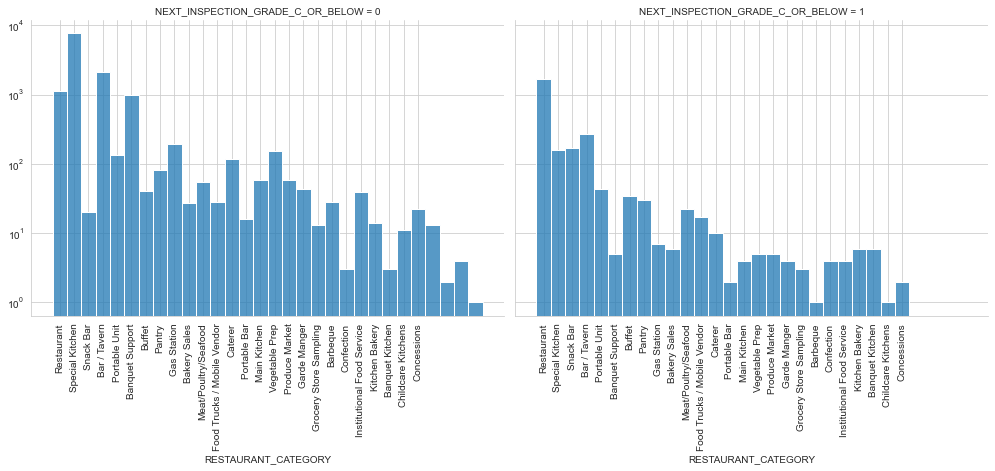

In [67]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'RESTAURANT_CATEGORY').set(yscale ='log')
for axes in g.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

- **Current Grade**
 1. Current_Grade has noisy data (.\<><1@#&|, 7, NASA, O, U, N)
 2. Fill NaN with based on current demerits. 

In [68]:
Data.groupby('CURRENT_GRADE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
CURRENT_GRADE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1
A,14860,14860,14801,14668,14860,14797,14642,14660,14808,14860,14860,14860,14860,14689,14650,14860,14705,14745,14860,14860,14860,14860,14719,14601,14696,14860,14860,14860,14860
B,212,212,210,211,212,211,207,206,211,212,212,212,212,208,209,212,209,211,212,212,212,212,210,211,209,212,212,212,212
C,100,100,100,98,100,100,97,99,99,100,100,100,100,99,98,100,100,99,100,100,100,100,99,99,99,100,100,100,100
N,9,9,9,9,9,9,9,9,8,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
NASA,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
O,32,32,32,32,32,32,31,32,32,32,32,32,32,32,31,32,31,32,32,32,32,32,32,32,32,32,32,32,32
X,75,75,75,74,75,75,73,75,75,75,75,75,75,74,73,75,75,75,75,75,75,75,75,72,73,75,75,75,75


In [69]:
Data[Data['CURRENT_GRADE'].isnull()].shape

(305, 30)

In [70]:
nagrade_index = Data[Data['CURRENT_GRADE'].isnull()].index
for index in nagrade_index:
    if (Data['CURRENT_DEMERITS'][index] >= 0) & (Data['CURRENT_DEMERITS'][index] <= 10):
        Data['CURRENT_GRADE'][index] = 'A'
    elif (Data['CURRENT_DEMERITS'][index] >= 11) & (Data['CURRENT_DEMERITS'][index] <= 20):
        Data['CURRENT_GRADE'][index] = 'B'
    elif (Data['CURRENT_DEMERITS'][index] >= 21) & (Data['CURRENT_DEMERITS'][index] <= 40):
        Data['CURRENT_GRADE'][index] = 'C'
    else: 
        Data['CURRENT_GRADE'][index] = 'X'

In [71]:
Data[Data['CURRENT_GRADE'].isnull()].shape

(0, 30)

In [72]:
Data = Data[ (Data.CURRENT_GRADE =='A+') | (Data.CURRENT_GRADE =='A') | (Data.CURRENT_GRADE =='B') | (Data.CURRENT_GRADE =='C') | (Data.CURRENT_GRADE =='N') | (Data.CURRENT_GRADE =='O') | (Data.CURRENT_GRADE =='X')]
Data.shape

(15593, 30)

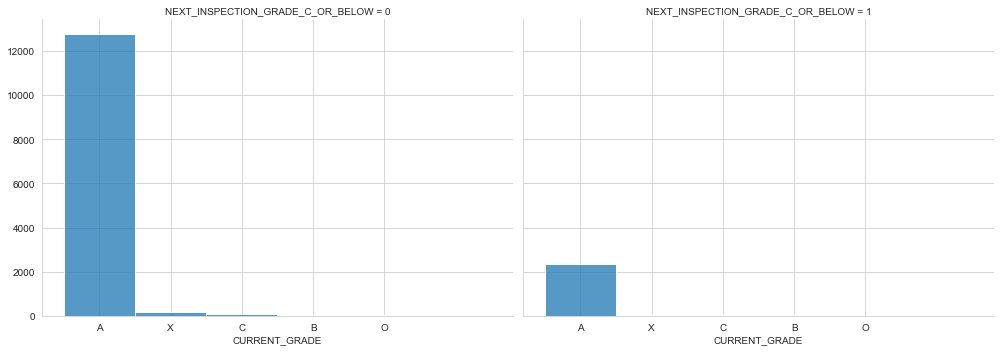

In [73]:
g = sns.FacetGrid(Data, col='NEXT_INSPECTION_GRADE_C_OR_BELOW',height=5, aspect=1.4)
g.map_dataframe(sns.histplot, 'CURRENT_GRADE')

- **Inspection Type**
 1. Inspection Type: Fill NaN with mode.
 2. Remove noisy(Routine Non-Inspection); leave Two type: Re-inspection, Routine Inspection

In [74]:
Data.groupby('INSPECTION_TYPE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
INSPECTION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Re-inspection,865,865,860,847,865,860,856,856,860,865,865,865,865,865,854,865,860,852,865,865,865,865,857,855,856,865,865,865,865
Routine Inspection,14507,14507,14447,14326,14507,14449,14287,14311,14455,14507,14507,14507,14507,14507,14337,14507,14351,14403,14507,14507,14507,14507,14370,14254,14346,14507,14507,14507,14507
Routine Non-Inspection,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [75]:
Data[Data['INSPECTION_TYPE'].isnull()].shape

(219, 30)

In [76]:
Data['INSPECTION_TYPE'] = Data['INSPECTION_TYPE'].fillna(Data['INSPECTION_TYPE'].mode()[0])
Data[Data['INSPECTION_TYPE'].isnull()].shape

(0, 30)

In [77]:
Data = Data[ (Data.INSPECTION_TYPE =='Re-inspection') | (Data.INSPECTION_TYPE =='Routine Inspection') ]
Data.shape

(15591, 30)

- **First Violation Type**
 1. First Violation Type: Fill NaN with mode.
 2. Remove noisy (Bullwinkle, Extra Crispy, and Not Sure); four types: Critical, Major, Non-Major, Imminent Health Hazard.

In [78]:
Data.groupby('FIRST_VIOLATION_TYPE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
FIRST_VIOLATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bullwinkle,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Critical,7161,7161,7127,7070,7161,7134,7068,7074,7126,7161,7161,7161,7161,7161,7080,7161,7161,7082,7105,7161,7161,7161,7161,7034,7078,7161,7161,7161,7161
Extra Crispy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Imminent Health Hazard,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Major,6698,6698,6671,6610,6698,6666,6585,6606,6679,6698,6698,6698,6698,6698,6625,6698,6698,6628,6643,6698,6698,6698,6698,6588,6623,6698,6698,6698,6698
Non-Major,1580,1580,1577,1561,1580,1572,1551,1551,1575,1580,1580,1580,1580,1580,1554,1580,1580,1567,1572,1580,1580,1580,1580,1557,1566,1580,1580,1580,1580
Not Sure,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [79]:
Data[Data['FIRST_VIOLATION_TYPE'].isnull()].shape

(146, 30)

In [80]:
Data['FIRST_VIOLATION_TYPE'] = Data['FIRST_VIOLATION_TYPE'].fillna(Data['FIRST_VIOLATION_TYPE'].mode()[0])
Data[Data['FIRST_VIOLATION_TYPE'].isnull()].shape

(0, 30)

In [81]:
Data = Data[ (Data.FIRST_VIOLATION_TYPE =='Major') | (Data.FIRST_VIOLATION_TYPE =='Non-Major') | (Data.FIRST_VIOLATION_TYPE =='Critical') | (Data.FIRST_VIOLATION_TYPE =='Imminent Health Hazard')]
Data.shape

(15588, 30)

In [82]:
Data.groupby('FIRST_VIOLATION_TYPE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,SECOND_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
FIRST_VIOLATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Critical,7307,7307,7272,7214,7307,7279,7214,7219,7272,7307,7307,7307,7307,7307,7223,7307,7307,7227,7251,7307,7307,7307,7307,7173,7223,7307,7307,7307,7307
Imminent Health Hazard,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Major,6698,6698,6671,6610,6698,6666,6585,6606,6679,6698,6698,6698,6698,6698,6625,6698,6698,6628,6643,6698,6698,6698,6698,6588,6623,6698,6698,6698,6698
Non-Major,1580,1580,1577,1561,1580,1572,1551,1551,1575,1580,1580,1580,1580,1580,1554,1580,1580,1567,1572,1580,1580,1580,1580,1557,1566,1580,1580,1580,1580


- **Second Violation Type**
 1. Second Violation Type: Fill NaN with mode.
 2. Remove noisy and only leave four types: Critical, Major, Non-Major, Imminent Health Hazard.

In [83]:
Data.groupby('SECOND_VIOLATION_TYPE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
SECOND_VIOLATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Critical,2972,2972,2956,2940,2972,2963,2938,2942,2957,2972,2972,2972,2972,2972,2937,2972,2972,2946,2948,2972,2972,2972,2972,2972,2938,2972,2972,2972,2972
Imminent Health Hazard,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Major,7867,7867,7835,7769,7867,7831,7751,7753,7835,7867,7867,7867,7867,7867,7778,7867,7867,7780,7804,7867,7867,7867,7867,7867,7770,7867,7867,7867,7867
Non-Major,4476,4476,4461,4410,4476,4453,4397,4411,4464,4476,4476,4476,4476,4476,4418,4476,4476,4430,4445,4476,4476,4476,4476,4476,4439,4476,4476,4476,4476
Supercritical,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [84]:
Data[Data['SECOND_VIOLATION_TYPE'].isnull()].shape

(267, 30)

In [85]:
Data['SECOND_VIOLATION_TYPE'] = Data['SECOND_VIOLATION_TYPE'].fillna(Data['SECOND_VIOLATION_TYPE'].mode()[0])
Data[Data['SECOND_VIOLATION_TYPE'].isnull()].shape

(0, 30)

In [86]:
Data = Data[ (Data.SECOND_VIOLATION_TYPE =='Major') | (Data.SECOND_VIOLATION_TYPE =='Non-Major') | (Data.SECOND_VIOLATION_TYPE =='Critical') | (Data.SECOND_VIOLATION_TYPE =='Imminent Health Hazard')]
Data.shape

(15587, 30)

In [87]:
Data.groupby('SECOND_VIOLATION_TYPE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,THIRD_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
SECOND_VIOLATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Critical,2972,2972,2956,2940,2972,2963,2938,2942,2957,2972,2972,2972,2972,2972,2937,2972,2972,2946,2948,2972,2972,2972,2972,2972,2938,2972,2972,2972,2972
Imminent Health Hazard,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Major,8134,8134,8100,8032,8134,8098,8013,8020,8102,8134,8134,8134,8134,8134,8044,8134,8134,8043,8070,8134,8134,8134,8134,8134,8032,8134,8134,8134,8134
Non-Major,4476,4476,4461,4410,4476,4453,4397,4411,4464,4476,4476,4476,4476,4476,4418,4476,4476,4430,4445,4476,4476,4476,4476,4476,4439,4476,4476,4476,4476


- **Third Violation Type**
 1. Third Violation Type: Fill NaN with mode.
 2. No noisy: leave four types: Critical, Major, Non-Major, Imminent Health Hazard.

In [88]:
Data.groupby('THIRD_VIOLATION_TYPE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
THIRD_VIOLATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Critical,866,866,863,853,866,863,856,858,859,866,866,866,866,866,858,866,866,861,861,866,866,866,866,866,866,866,866,866,866
Imminent Health Hazard,37,37,37,36,37,36,36,37,37,37,37,37,37,37,37,37,37,37,36,37,37,37,37,37,37,37,37,37,37
Major,7271,7271,7233,7181,7271,7250,7170,7181,7240,7271,7271,7271,7271,7271,7178,7271,7271,7188,7215,7271,7271,7271,7271,7271,7271,7271,7271,7271,7271
Non-Major,7240,7240,7218,7144,7240,7197,7117,7130,7220,7240,7240,7240,7240,7240,7160,7240,7240,7168,7184,7240,7240,7240,7240,7240,7240,7240,7240,7240,7240


In [89]:
Data[Data['THIRD_VIOLATION_TYPE'].isnull()].shape

(173, 30)

In [90]:
Data['THIRD_VIOLATION_TYPE'] = Data['THIRD_VIOLATION_TYPE'].fillna(Data['THIRD_VIOLATION_TYPE'].mode()[0])
Data[Data['THIRD_VIOLATION_TYPE'].isnull()].shape

(0, 30)

In [92]:
Data.groupby('THIRD_VIOLATION_TYPE').count()

,RESTAURANT_SERIAL_NUMBER,RESTAURANT_PERMIT_NUMBER,RESTAURANT_NAME,RESTAURANT_LOCATION,RESTAURANT_CATEGORY,ADDRESS,CITY,STATE,ZIP,CURRENT_DEMERITS,CURRENT_GRADE,EMPLOYEE_COUNT,MEDIAN_EMPLOYEE_AGE,MEDIAN_EMPLOYEE_TENURE,INSPECTION_TIME,INSPECTION_TYPE,INSPECTION_DEMERITS,VIOLATIONS_RAW,RECORD_UPDATED,LAT_LONG_RAW,FIRST_VIOLATION,SECOND_VIOLATION,THIRD_VIOLATION,FIRST_VIOLATION_TYPE,SECOND_VIOLATION_TYPE,NUMBER_OF_VIOLATIONS,NEXT_INSPECTION_GRADE_C_OR_BELOW,LAT,LONG
THIRD_VIOLATION_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Critical,866,866,863,853,866,863,856,858,859,866,866,866,866,866,858,866,866,861,861,866,866,866,866,866,866,866,866,866,866
Imminent Health Hazard,37,37,37,36,37,36,36,37,37,37,37,37,37,37,37,37,37,37,36,37,37,37,37,37,37,37,37,37,37
Major,7444,7444,7404,7354,7444,7423,7343,7353,7412,7444,7444,7444,7444,7444,7349,7444,7444,7358,7387,7444,7444,7444,7444,7444,7444,7444,7444,7444,7444
Non-Major,7240,7240,7218,7144,7240,7197,7117,7130,7220,7240,7240,7240,7240,7240,7160,7240,7240,7168,7184,7240,7240,7240,7240,7240,7240,7240,7240,7240,7240


#### Pivot Table

In [89]:
pivot_table = Data.pivot_table(index=['INSPECTION_TYPE','FIRST_VIOLATION_TYPE','SECOND_VIOLATION_TYPE', 'THIRD_VIOLATION_TYPE'],values=['FIRST_VIOLATION','SECOND_VIOLATION', 'THIRD_VIOLATION'],aggfunc=['count'])

In [90]:
pivot_table

count  \
                                                                                        FIRST_VIOLATION   
INSPECTION_TYPE    FIRST_VIOLATION_TYPE   SECOND_VIOLATION_TYPE  THIRD_VIOLATION_TYPE                     
Re-inspection      Critical               Critical               Critical                            28   
                                                                 Major                               83   
                                                                 Non-Major                            1   
                                          Major                  Major                               99   
                                                                 Non-Major                           87   
                                          Non-Major              Major                                1   
                                                                 Non-Major                           36   
                   Major                  Major                  Imminent Health Hazard               2   
                                                                 Major                               90   
                                                                 Non-Major                          152   
                                          Non-Major              Major                                1   
                                                                 Non-Major                          194   
                   Non-Major              Major                  Non-Major                            1   
                                          Non-Major              Non-Major                           90   
Routine Inspection Critical               Critical               Critical                           719   
                                                                 Imminent Health Hazard               8   
                                                                 Major                             2035   
                                                                 Non-Major                            8   
                                          Imminent Health Hazard Imminent Health Hazard               1   
                                          Major                  Critical                            30   
                                                                 Imminent Health Hazard              18   
                                                                 Major                             2768   
                                                                 Non-Major                          999   
                                          Non-Major              Critical                             8   
                                                                 Imminent Health Hazard               1   
                                                                 Major                               20   
                                                                 Non-Major                          357   
                   Imminent Health Hazard Imminent Health Hazard Imminent Health Hazard               3   
                   Major                  Critical               Critical                             5   
                                                                 Major                               44   
                                                                 Non-Major                           32   
                                          Imminent Health Hazard Imminent Health Hazard               1   
                                          Major                  Critical                            12   
                                                                 Imminent Health Hazard               2   
                                                                 Major                             1820   
                                

> Save data
- save the data to a new csv file

In [91]:
from library.sb_utils import save_file

In [92]:
datapath = '../data'
save_file(Data, 'TRAIN_SET_2021_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\TRAIN_SET_2021_cleaned.csv"
